# A exploratoring data analysis on the data of House Prices


The Data Analysis (EDA) includes the below points:

*   Knowing dataset and its data.
*   Finding missing Values
*   Descriptive Statistics, unique values
*   Checking Numerical Variables
*   Identify shape
*   Finding discrete, continuous Variables 
*   Plotting features against target
*   Outliers
*   Correlation between variables

In [2]:
#importing python libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)


In [3]:
#importing csv file
dataset = pd.read_csv('/content/House_Prices (1).csv')

In [ ]:
# print shape of dataset with rows and columns
print(dataset.shape)

(21613, 21)


In [6]:
#Displaying the data from csv file imported
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#displaying the information of the file like column_names ,its data type, etc, to get familiarized with content of the dataset
#we will be working on:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Finding the missing values of the dataset :
---



In [8]:
## displaying the list of features whose values are missing
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Our data set has no missing data.

---



Numerical Variables:

In [9]:
# creating a list of numerical variables:
num_features = [f for f in dataset.columns if dataset[f].dtypes != 'O']

print('Number of numerical variables in the dataset: ', len(num_features))

# showing the numerical variables
dataset[num_features].head()

Number of numerical variables in the dataset:  20


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We have 20 numerical columns in the dataset with values. Out of which id column is not significant for eda.

Descriptive Statistics

In [10]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Number of unique values for each column

In [11]:
unique_val= dataset.nunique()
print("Uniques values in each column are:")
print(unique_val)

Uniques values in each column are:
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [12]:
df=dataset.copy()

In [13]:
# creating 'year' and 'month' of sale columns on the 'date' column which will make easy plotting and understanding the analysis 
df['yr_sold'] = pd.DatetimeIndex(df['date']).year
df.head()
df['month_sold'] = pd.DatetimeIndex(df['date']).month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [ ]:
# dropping date column
del df['date']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [38]:
# creating a list of variables that has year information
year_feature = [feature for feature in df if 'yr' in feature]

year_feature

['yr_built', 'yr_renovated', 'yr_sold']

In [39]:
for f in year_feature:
    print(f, df[f].unique())

yr_built [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
yr_renovated [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]
yr_sold [2014 2015]


Text(0.5, 1.0, 'House_Price vs YearSold')

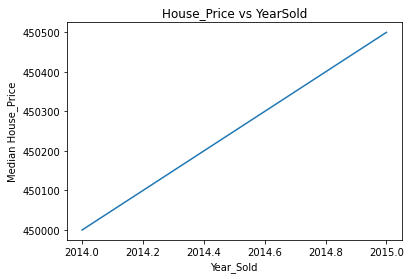

In [40]:
df.groupby('yr_sold')['price'].median().plot()
plt.xlabel('Year_Sold')
plt.ylabel('Median House_Price')
plt.title("House_Price vs YearSold")

We can see that as the years pass, the housing prices are increasing.

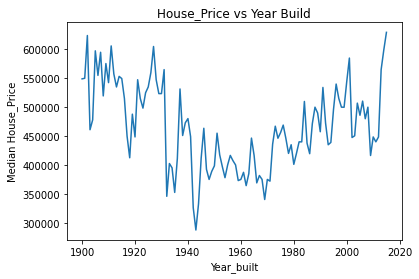

In [41]:
df.groupby('yr_built')['price'].median().plot()
plt.xlabel('Year_built')
plt.ylabel('Median House_Price')
plt.title("House_Price vs Year Build")
plt.show()

The plot shows that the houses built during early times and the houses which are in latest years are more costly. The reason for houses being costly during early time could be more construction cost as there was less technology. And the reason of houses being costly now could the ambiences and the views etc surrounding the house.

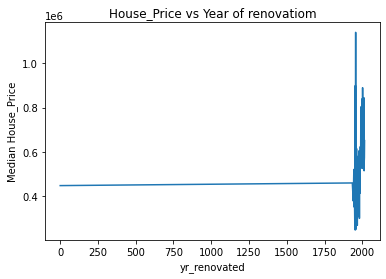

In [42]:
df.groupby('yr_renovated')['price'].median().plot()
plt.xlabel('yr_renovated')
plt.ylabel('Median House_Price')
plt.title("House_Price vs Year of renovatiom")
plt.show()

Finding discrete variables:

In [43]:
discrete_feature=[f for f in df if len(df[f].unique())<31 and f not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
df[discrete_feature].head()

Discrete Variables Count: 9


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,month_sold,Review
0,3,1.00,1.0,0,0,3,7,10,Good
1,3,2.25,2.0,0,0,3,7,12,Good
2,2,1.00,1.0,0,0,3,6,2,Good
3,4,3.00,1.0,0,0,5,7,12,Luxury
4,3,2.00,1.0,0,0,3,8,2,Good


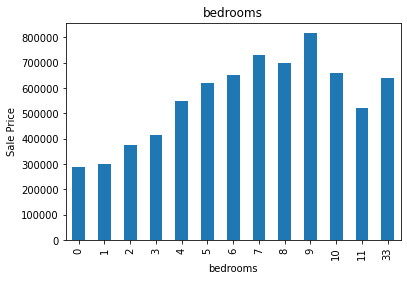

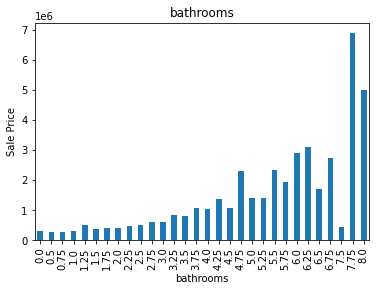

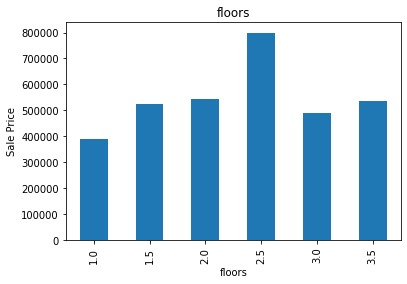

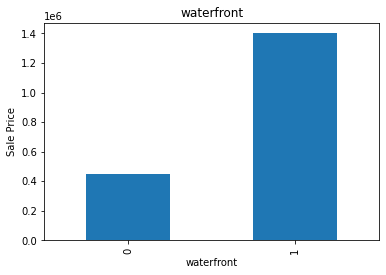

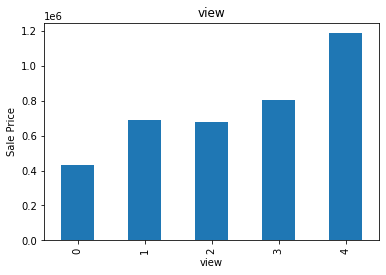

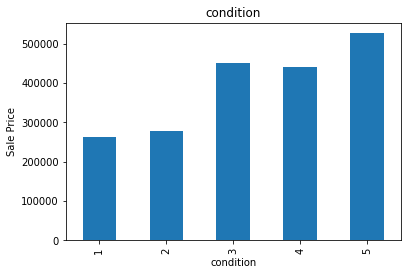

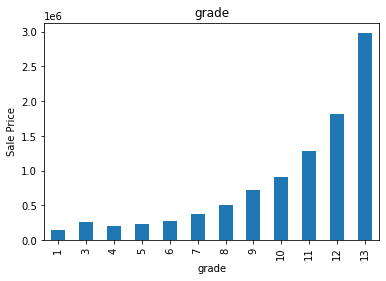

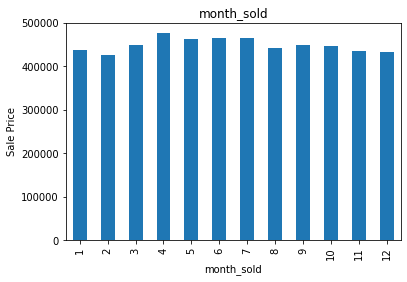

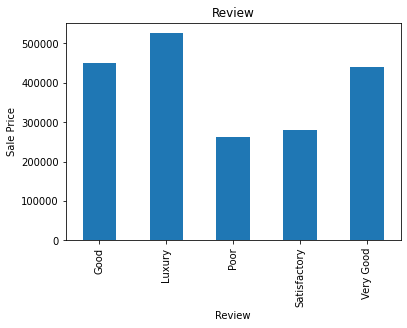

In [44]:
## Finding the realtionship between discrete variables and Saling Price

for f in discrete_feature:
    df1=df.copy()
    df1.groupby(f)['price'].median().plot.bar()
    plt.xlabel(f)
    plt.ylabel('Sale Price')
    plt.title(f)
    plt.show()

According to the above plots:
1. The housing prices are increasing wrt to the increase in no. of bedrooms, but not significantly after specific number of bedrooms per house.
2. People prefer buying houses with 2.5 floors.
3. People love waterfront houses hence those houses are costly.
4. A good view, and also good condition of the house leads to higher cost.
5. Here, we can see that the quality of design and construction significantly increases the house prices.
6. We can see that, increase in number of bathrooms in the house significantly increases the house prices.


Finding continuous variables:

In [46]:
continuous_feature=[f for f in df if f not in discrete_feature + year_feature + ['id']]
print("Continuous feature Count {}".format(len(continuous_feature)))
df[continuous_feature].head()

Continuous feature Count 11


,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,1180,5650,1180,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,2570,7242,2170,400,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,770,10000,770,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,1960,5000,1050,910,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,1680,8080,1680,0,98074,47.6168,-122.045,1800,7503


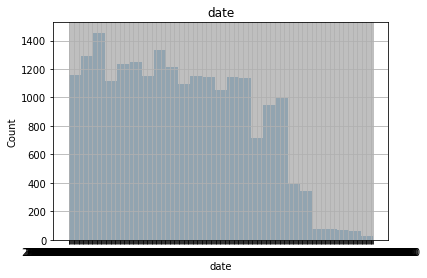

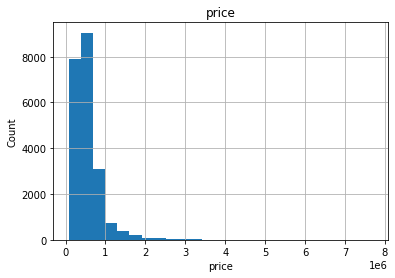

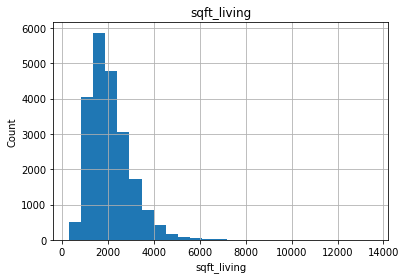

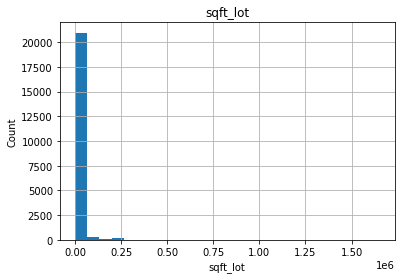

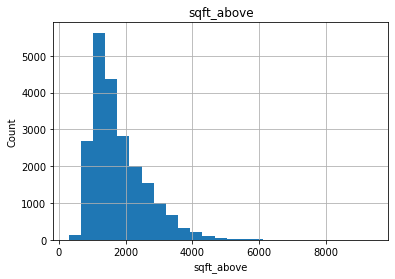

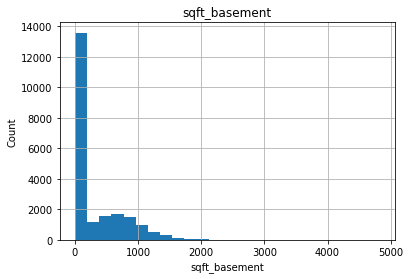

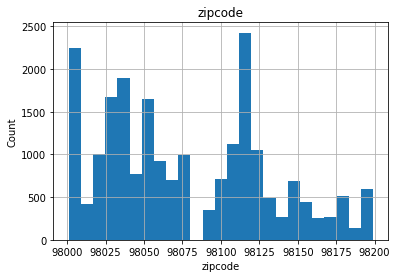

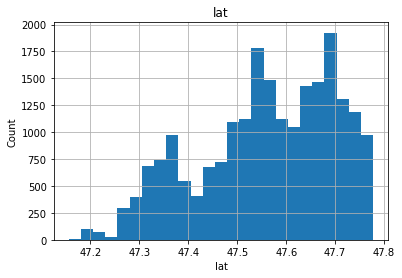

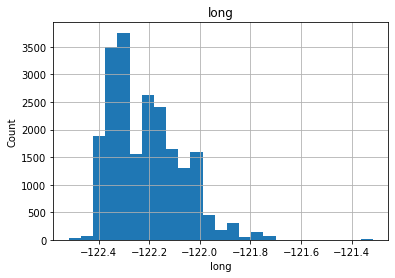

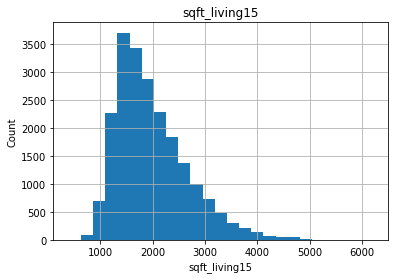

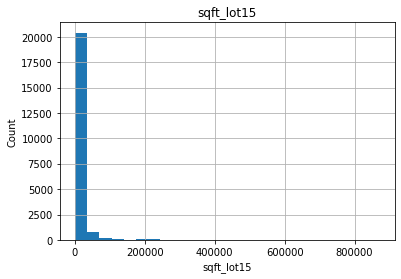

In [47]:
# Lets plot histograms to understand the distribution and analyse the continuous variable: 

for f in continuous_feature:
    df2=df.copy()
    df2[f].hist(bins=25)
    plt.xlabel(f)
    plt.ylabel("Count")
    plt.title(f)
    plt.show()

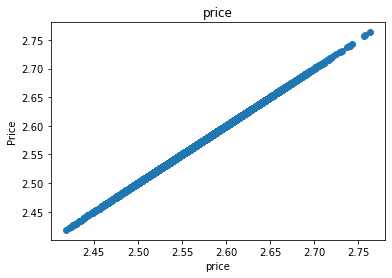

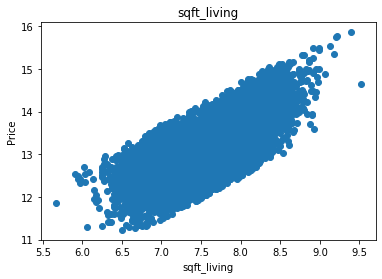

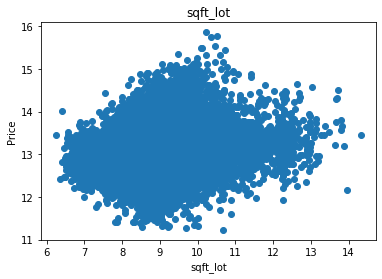

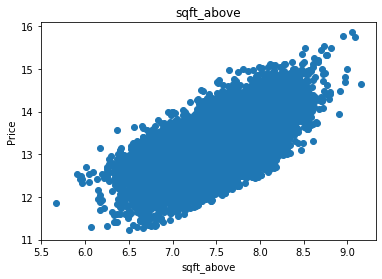

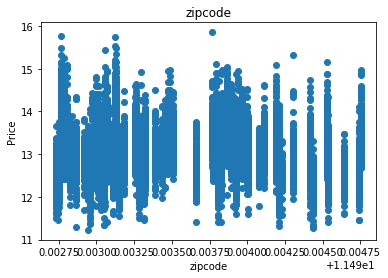

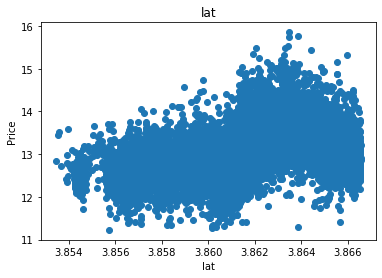

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


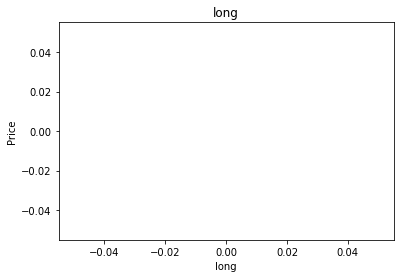

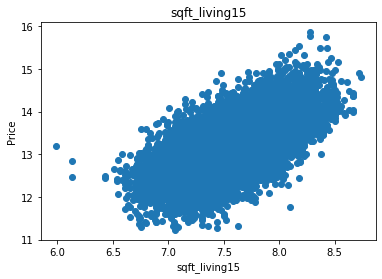

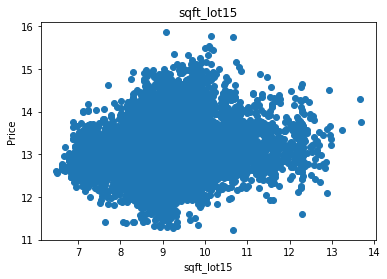

In [ ]:
## Using logarithmic transformation and displaying scatter plot against Sale price

for f in continuous_feature:
    df2=df.copy()
    if 0 in df2[f].unique():
        pass
    else:
        df2[f]=np.log(df2[f])
        df2['price']=np.log(df2['price'])
        plt.scatter(df2[f],df2['price'])
        plt.xlabel(f)
        plt.ylabel('Price')
        plt.title(f)
        plt.show()

We can see that as the sqft of the interior living space of the house and its neighbors increases, then the sale prices increases, same goes for sqft of interior living space which is above ground level.

Finding Outliers:

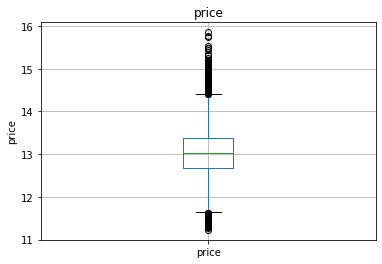

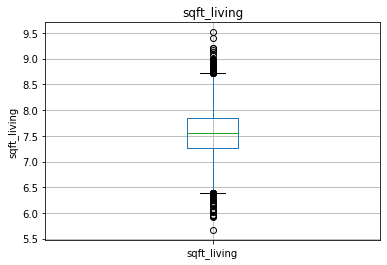

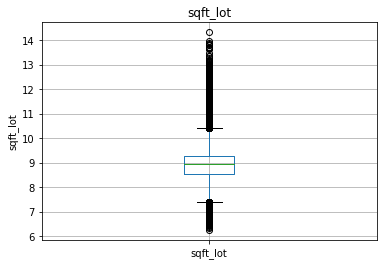

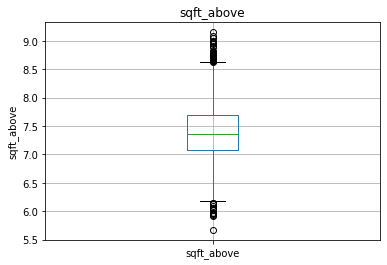

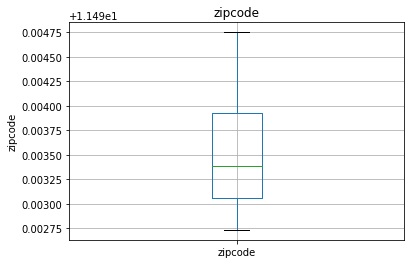

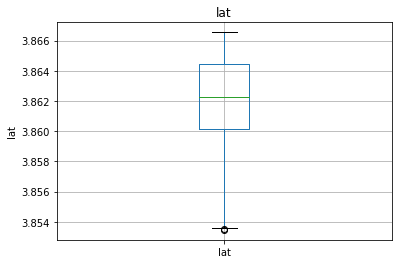

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


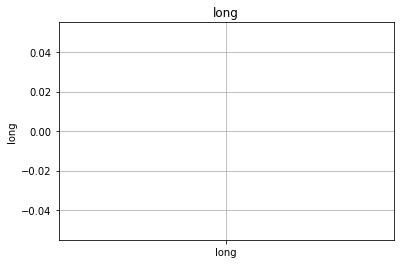

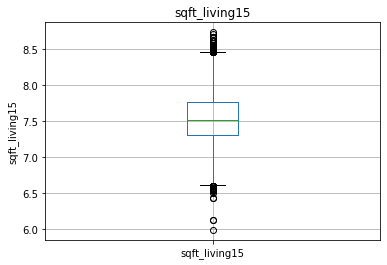

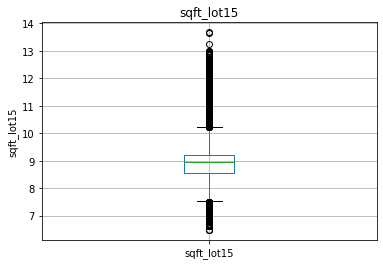

In [ ]:
for f in continuous_feature:
    df2=df.copy()
    if 0 in df2[f].unique():
        pass
    else:
        df2[f]=np.log(df2[f])
        df2.boxplot(column=f)
        plt.ylabel(f)
        plt.title(f)
        plt.show()

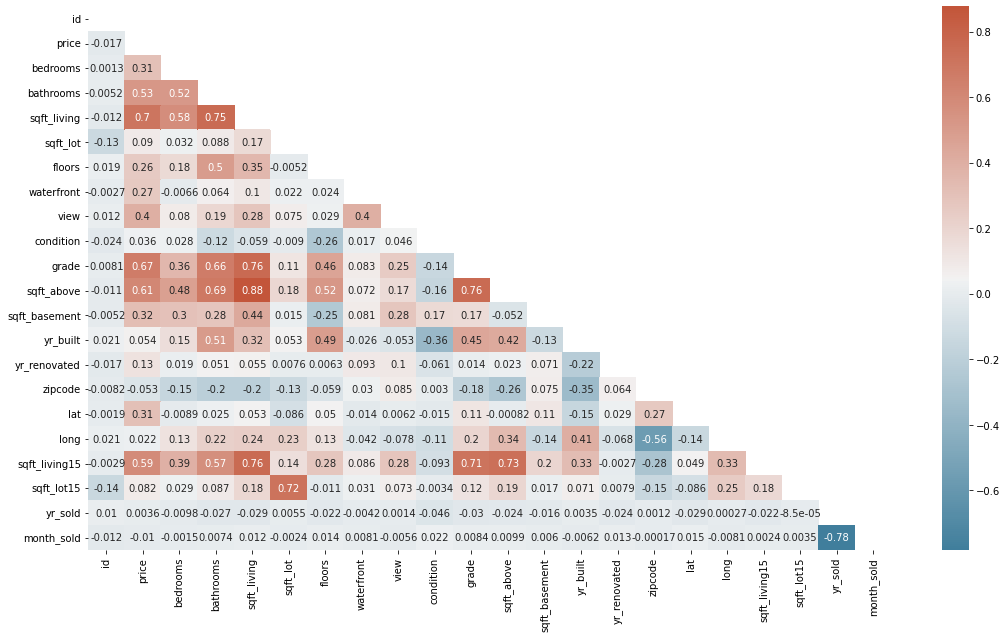

In [ ]:
# plotting heat map to find the correlation between different variables
corr = df.corr()

# configuring matplotlib plot 
f, ax = plt.subplots(figsize=(18, 10))

# Generating a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plotting heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

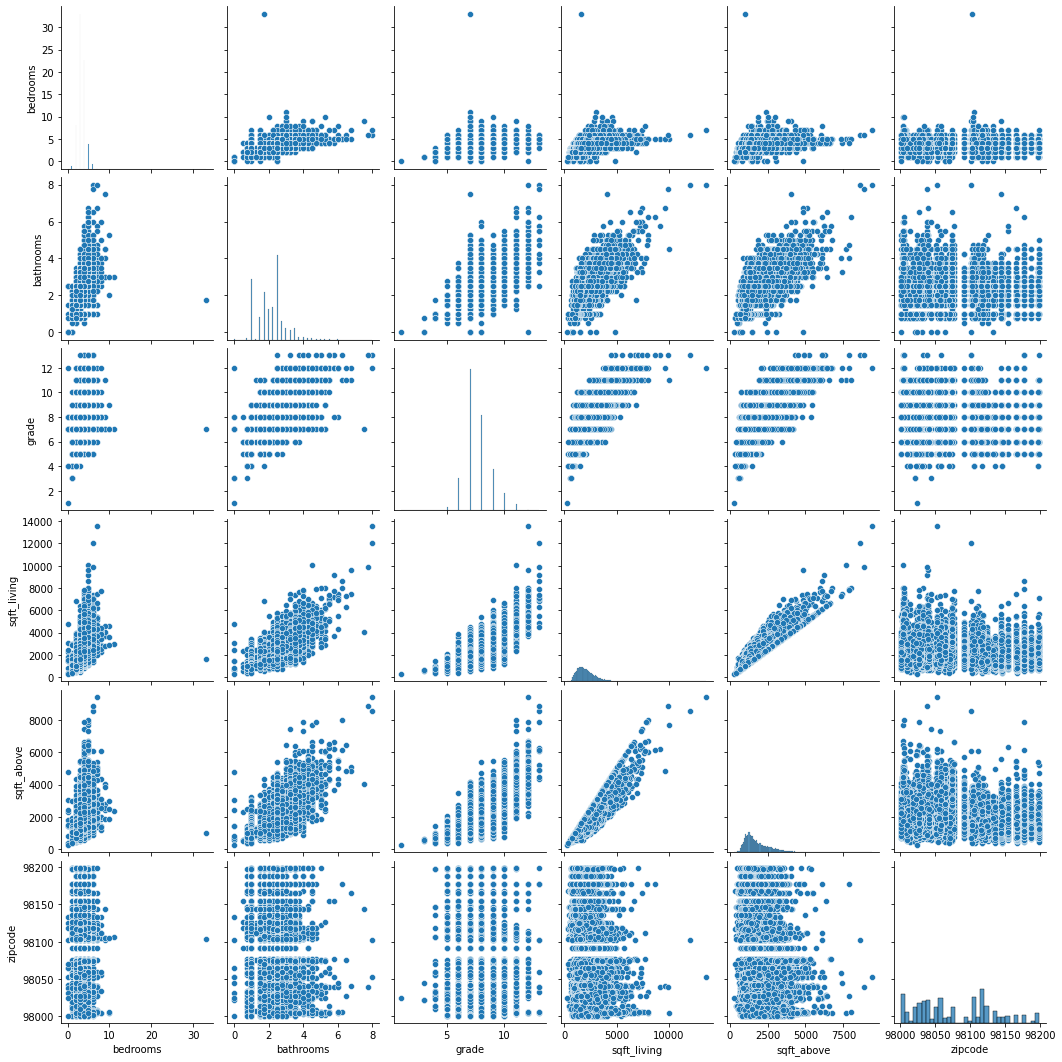

In [14]:
#pair plot
df_seg=df.loc[:, ["bedrooms","bathrooms","grade","sqft_living","sqft_above","zipcode"]]
df_seg.head()
sns.pairplot(df_seg)
plt.show()


Matrix Form

In [48]:
np_array = df.to_numpy() 

display(np_array)

array([[7129300520, '20141013T000000', 221900.0, ..., 2014, 10, 'Good'],
       [6414100192, '20141209T000000', 538000.0, ..., 2014, 12, 'Good'],
       [5631500400, '20150225T000000', 180000.0, ..., 2015, 2, 'Good'],
       ...,
       [1523300141, '20140623T000000', 402101.0, ..., 2014, 6, 'Good'],
       [291310100, '20150116T000000', 400000.0, ..., 2015, 1, 'Good'],
       [1523300157, '20141015T000000', 325000.0, ..., 2014, 10, 'Good']],
      dtype=object)

Merging Two DataFreames

In [49]:
df2=df[['bedrooms','bathrooms']]
df3=df[['sqft_living','sqft_lot','sqft_above']]
df3

,sqft_living,sqft_lot,sqft_above
0,1180,5650,1180
1,2570,7242,2170
2,770,10000,770
3,1960,5000,1050
4,1680,8080,1680
...,...,...,...
21608,1530,1131,1530
21609,2310,5813,2310
21610,1020,1350,1020
21611,1600,2388,1600


In [50]:
df4=pd.concat([df2,df3])

Conditions:

Condition 1

In [19]:
df6=df[(df.bedrooms <3 ) ]
df6

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
11,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014,5
18,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014,12
23,8091400200,20140516T000000,252700.0,2,1.50,1070,9643,1.0,0,0,3,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386,2014,5
31,2426039314,20141201T000000,280000.0,2,1.50,1190,1265,3.0,0,0,3,7,1190,0,2005,0,98133,47.7274,-122.357,1390,1756,2014,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21586,2767604724,20141015T000000,505000.0,2,2.50,1430,1201,3.0,0,0,3,8,1430,0,2009,0,98107,47.6707,-122.381,1430,1249,2014,10
21588,2767600688,20141113T000000,414500.0,2,1.50,1210,1278,2.0,0,0,3,8,1020,190,2007,0,98117,47.6756,-122.375,1210,1118,2014,11
21595,1972201967,20141031T000000,520000.0,2,2.25,1530,981,3.0,0,0,3,8,1480,50,2006,0,98103,47.6533,-122.346,1530,1282,2014,10
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6


Conditions 2

In [20]:
df7=df[(df.price<300000) & (df.bedrooms>=2) ]
df7

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21526,1760650820,20150428T000000,290000.0,3,2.25,1610,3764,2.0,0,0,3,7,1610,0,2012,0,98042,47.3589,-122.083,1610,3825,2015,4
21550,880000205,20140729T000000,249000.0,3,2.00,1260,1125,2.0,0,0,3,7,810,450,2011,0,98106,47.5262,-122.361,1260,1172,2014,7
21572,6056111067,20140707T000000,230000.0,3,1.75,1140,1201,2.0,0,0,3,8,1140,0,2014,0,98108,47.5637,-122.295,1210,1552,2014,7
21585,3832050760,20140828T000000,270000.0,3,2.50,1870,5000,2.0,0,0,3,7,1870,0,2009,0,98042,47.3339,-122.055,2170,5399,2014,8


Condition 3

In [21]:
df8=df[(df.price<400000) & (df.bathrooms==2) & (df.zipcode==98178) ]
df8

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold
470,2172000075,20140623T000000,290900.0,2,2.0,1610,17600,2.0,0,0,3,6,1610,0,1930,1983,98178,47.4855,-122.266,1310,12950,2014,6
1145,3352402236,20141215T000000,252500.0,3,2.0,1150,6000,1.0,0,0,5,7,1150,0,1956,0,98178,47.4980,-122.263,1980,6360,2014,12
1608,9368700341,20140822T000000,285000.0,3,2.0,2110,6900,1.5,0,0,5,6,1220,890,1955,0,98178,47.5040,-122.260,1350,7683,2014,8
1797,185000118,20150223T000000,212000.0,4,2.0,1880,7500,1.0,0,0,5,6,980,900,1946,0,98178,47.4950,-122.266,1670,14350,2015,2
1824,3810000565,20140702T000000,255000.0,4,2.0,2430,8960,1.0,0,0,3,7,1430,1000,1960,0,98178,47.4979,-122.232,2430,8960,2014,7
2769,3352401981,20140521T000000,199000.0,4,2.0,2030,8120,2.0,0,0,3,7,2030,0,1950,0,98178,47.4994,-122.261,1520,9440,2014,5
3083,5476200123,20140710T000000,200000.0,4,2.0,2090,6630,1.0,0,0,3,7,1070,1020,1974,0,98178,47.5077,-122.268,1550,7980,2014,7
4186,8073000265,20140918T000000,360000.0,3,2.0,1960,8846,1.0,0,3,4,6,980,980,1940,0,98178,47.5101,-122.246,2190,6363,2014,9
6999,8069000216,20140722T000000,356200.0,3,2.0,1690,10062,1.0,0,2,5,7,940,750,1928,0,98178,47.5102,-122.241,2390,6650,2014,7
7744,4136800205,20150219T000000,258000.0,2,2.0,750,6553,1.5,0,2,3,7,750,0,1945,0,98178,47.4982,-122.221,1140,7500,2015,2


Condition 4

In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,month_sold
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [23]:
np.average(df.price)

540088.1417665294

Creating Function:

In [25]:
def Customer_Requirement(a,b,c): 
  df10=df.drop(columns=['date','waterfront','lat','long','sqft_living','sqft_lot15','Review'])
  try:
    x=df10[(df.price<a) & (df.bedrooms>=b) & (df.zipcode==c) ] 
    print(x)
  except:
    print('No options avalaible')

In [197]:
Customer_Requirement(400000,2,98178)

               id     price  bedrooms  bathrooms  sqft_lot  floors  view  \
0      7129300520  221900.0         3       1.00      5650     1.0     0   
117    4060000240  205425.0         2       1.00      6780     1.0     0   
273    2976800796  236000.0         3       1.00      5898     1.0     0   
281    6874200960  170000.0         2       1.00      5265     1.0     0   
339    4268200055  245000.0         3       1.75     11547     1.0     0   
...           ...       ...       ...        ...       ...     ...   ...   
19501  3878900464  229500.0         2       1.75      6625     1.0     0   
19555  3379200100  334000.0         4       2.50      6080     1.0     2   
19799  2172000890  385000.0         4       2.50      6238     2.0     0   
19995  1123049232  279000.0         5       2.50      5557     2.0     0   
20903  7813500040  335000.0         4       2.50      3301     2.0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        

Creating Categorical Column & Function

In [29]:
df.loc[df['condition']==1,'Review']='Poor'
df.loc[df['condition']==2,'Review']='Satisfactory'
df.loc[df['condition']==3,'Review']='Good'
df.loc[df['condition']==4,'Review']='Very Good'
df.loc[df['condition']==5,'Review']='Luxury'

In [31]:
df11=df.groupby(['price','Review','id']).size()

df11.head()

price    Review        id        
75000.0  Good          3421079032    1
78000.0  Poor          40000362      1
80000.0  Satisfactory  8658300340    1
81000.0  Poor          3028200080    1
82000.0  Good          3883800011    1
dtype: int64

In [34]:
z={'1':'Poor','2':'Satisfactory','3':'Good','4':'Very Good','5':'Luxury'}
 

Keyword Argument Function (**kwarg)

In [35]:
def argument(**kwarg):
  col_list = df["bedrooms"].values.tolist()
  rating_list =df["condition"].values.tolist()
  apartment_id=df["id"].values.tolist()
  for i in col_list:
           print(f"The apartment ID {apartment_id[i]} has {col_list[i]} bedrooms and customer has rated {kwarg.get(str(i))}")
           #print(f"The apartment has {col_list[i]} bedrooms and customer has rated {z[str(i)]}")

argument(**z) 

Streaming output truncated to the last 5000 lines.
The apartment ID 2487200875 has 4 bedrooms and customer has rated Good
The apartment ID 7237550310 has 4 bedrooms and customer has rated Luxury
The apartment ID 7237550310 has 4 bedrooms and customer has rated Luxury
The apartment ID 1954400510 has 3 bedrooms and customer has rated Very Good
The apartment ID 7237550310 has 4 bedrooms and customer has rated Luxury
The apartment ID 1954400510 has 3 bedrooms and customer has rated Very Good
The apartment ID 5631500400 has 2 bedrooms and customer has rated Satisfactory
The apartment ID 2487200875 has 4 bedrooms and customer has rated Good
The apartment ID 2487200875 has 4 bedrooms and customer has rated Good
The apartment ID 2487200875 has 4 bedrooms and customer has rated Good
The apartment ID 1954400510 has 3 bedrooms and customer has rated Very Good
The apartment ID 7237550310 has 4 bedrooms and customer has rated Luxury
The apartment ID 7237550310 has 4 bedrooms and customer has rated 